# 第五部分 Pandas数据预处理（鸢尾花数据处理）

## 5-1 合并数据

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

![](img/4-Dataframe之concat.png)

![](img/5-Dataframe数据合并-1.png) 
![](img/5-Dataframe数据合并-2.png) 
![](img/5-Dataframe数据合并-3.png) 

In [2]:
# 生成数据
# 创建DataFrame
import pandas as pd
df1 = pd.DataFrame({"Name":["张三","李四","王五"],
                   "Age":[18,25,30],
                   "Sex":["男","女","女"],
                   "Grade":[1,2,3]})
df1

,Name,Age,Sex,Grade
0,张三,18,男,1
1,李四,25,女,2
2,王五,30,女,3


In [3]:
df2 = pd.DataFrame({"Name":["赵六","钱七"],
                   "Age":[19,21],
                   "Sex":["男","女"],
                   "City":["深圳","北京"]})
df2

,Age,City,Name,Sex
0,19,深圳,赵六,男
1,21,北京,钱七,女


In [12]:
# 简单的合并
pd.concat([df1,df2],axis=0,ignore_index=True)
# axis=1
pd.concat([df1,df2],axis=1)

,Name,Age,Sex,Grade,City
0,张三,18,男,1.0,NaN
1,李四,25,女,2.0,NaN
2,王五,30,女,3.0,NaN
3,赵六,19,男,NaN,深圳
4,钱七,21,女,NaN,北京


,Name,Age,Sex,Grade,Name,Age,Sex,City
0,张三,18,男,1,赵六,19.0,男,深圳
1,李四,25,女,2,钱七,21.0,女,北京
2,王五,30,女,3,NaN,NaN,NaN,NaN


In [16]:
df1;df2;df2.index=[4,5];df2
#axis=1是以index来连接的
pd.concat([df1,df2],axis=1)

,Name,Age,Sex,Grade
0,张三,18,男,1
1,李四,25,女,2
2,王五,30,女,3


,Name,Age,Sex,City
4,赵六,19,男,深圳
5,钱七,21,女,北京


,Name,Age,Sex,City
4,赵六,19,男,深圳
5,钱七,21,女,北京


,Name,Age,Sex,Grade,Name,Age,Sex,City
0,张三,18.0,男,1.0,NaN,NaN,NaN,NaN
1,李四,25.0,女,2.0,NaN,NaN,NaN,NaN
2,王五,30.0,女,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,赵六,19.0,男,深圳
5,NaN,NaN,NaN,NaN,钱七,21.0,女,北京


In [19]:
df1;df2.index=[0,4];df2
# 纵向合并-inner：内连接
df=pd.concat([df1,df2],axis=0,ignore_index=True,join="inner")
df

,Name,Age,Sex,Grade
0,张三,18,男,1
1,李四,25,女,2
2,王五,30,女,3


,Name,Age,Sex,City
0,赵六,19,男,深圳
4,钱七,21,女,北京


,Name,Age,Sex
0,张三,18,男
1,李四,25,女
2,王五,30,女
3,赵六,19,男
4,钱七,21,女


In [20]:
# 纵向合并-outer：并集
pd.concat([df1,df2],axis=0,ignore_index=True,join="outer")

,Name,Age,Sex,Grade,City
0,张三,18,男,1.0,NaN
1,李四,25,女,2.0,NaN
2,王五,30,女,3.0,NaN
3,赵六,19,男,NaN,深圳
4,钱七,21,女,NaN,北京


In [22]:
# 横向合并
pd.concat([df1,df2],axis=1,join="inner")
pd.concat([df1,df2],axis=1,join="outer")

,Name,Age,Sex,Grade,Name,Age,Sex,City
0,张三,18,男,1,赵六,19,男,深圳


,Name,Age,Sex,Grade,Name,Age,Sex,City
0,张三,18.0,男,1.0,赵六,19.0,男,深圳
1,李四,25.0,女,2.0,NaN,NaN,NaN,NaN
2,王五,30.0,女,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,钱七,21.0,女,北京


In [27]:
# 生成语文数学成绩
dict = {"chn":[90,85,62,58,75],
       "math":[96,66,73,60,90]}
df3 = pd.DataFrame(dict)
df3
# 合并
df=pd.concat([df1,df2],ignore_index=True,join="inner")
df

,chn,math
0,90,96
1,85,66
2,62,73
3,58,60
4,75,90


,Name,Age,Sex
0,张三,18,男
1,李四,25,女
2,王五,30,女
3,赵六,19,男
4,钱七,21,女


In [29]:
# 横向合并
df_final=pd.concat([df,df3],axis=1)
df_final

,Name,Age,Sex,chn,math
0,张三,18,男,90,96
1,李四,25,女,85,66
2,王五,30,女,62,73
3,赵六,19,男,58,60
4,钱七,21,女,75,90


## 项目步骤：学生成绩和班级表的合并

In [5]:
# 基于键的合并
import pandas as pd
# 读入成绩表
df_score=pd.read_excel("data/sample.xlsx",sheet_name="Sheet3")
df_score

,姓名,班级编号,成绩
0,张三,1001,89
1,李四,1002,97
2,王五,1003,100
3,赵六,1001,60


In [6]:
# 读入班级表
df_class=pd.read_excel("data/sample.xlsx",sheet_name="Sheet4")
df_class

,班级号,班级名称
0,1001,计信1班
1,1002,计信2班
2,1003,计信3班


In [9]:
# 简单合并
pd.concat([df_score,df_class],axis=1)
pd.concat([df_score,df_class],axis=0)
# pd.merge()

,姓名,班级编号,成绩,班级号,班级名称
0,张三,1001,89,1001.0,计信1班
1,李四,1002,97,1002.0,计信2班
2,王五,1003,100,1003.0,计信3班
3,赵六,1001,60,NaN,NaN


,姓名,班级编号,成绩,班级号,班级名称
0,张三,1001.0,89.0,NaN,NaN
1,李四,1002.0,97.0,NaN,NaN
2,王五,1003.0,100.0,NaN,NaN
3,赵六,1001.0,60.0,NaN,NaN
0,NaN,NaN,NaN,1001.0,计信1班
1,NaN,NaN,NaN,1002.0,计信2班
2,NaN,NaN,NaN,1003.0,计信3班


![](img/4-Dataframe之merge.png)
![](img/4-Dataframe之merge-1.png)

In [20]:
# 以班级编号为键合并inner
# pd.merge(
#     left: 'DataFrame | Series',
#     right: 'DataFrame | Series',
#     how: 'MergeHow' = 'inner',
#     on: 'IndexLabel | None' = None,
#     left_on: 'IndexLabel | None' = None,
#     right_on: 'IndexLabel | None' = None,
#     left_index: 'bool' = False,
#     right_index: 'bool' = False,
#     sort: 'bool' = False,
#     suffixes: 'Suffixes' = ('_x', '_y'),  #指明重复名字自动添加，用于区分的，因为不能重名
# ) -> 'DataFrame'
df_score;df_class
pd.merge(df_score,df_class,how="inner",left_on='班级编号',right_on="班级号")

,姓名,班级编号,成绩
0,张三,1001,89
1,李四,1002,97
2,王五,1003,100
3,赵六,1001,60


,班级号,班级名称
0,1001,计信1班
1,1002,计信2班
2,1003,计信3班


,姓名,班级编号,成绩,班级号,班级名称
0,张三,1001,89,1001,计信1班
1,赵六,1001,60,1001,计信1班
2,李四,1002,97,1002,计信2班
3,王五,1003,100,1003,计信3班


In [ ]:
# 以班级编号为键合并outer

In [4]:
# 读入另一个班级表，班级编号-》班级号
df_class_1=pd.read_excel("data/sample.xlsx",sheet_name="Sheet6")
df_class_1

,班级编号,班级名称
0,1002,计信2班
1,1003,计信3班
2,1004,计信4班


In [23]:
# merge
pd.merge(df_score,df_class_1,on="班级编号",how="inner")
pd.merge(df_score,df_class_1,on="班级编号",how="outer")
pd.merge(df_score,df_class_1,on="班级编号",how="left")
pd.merge(df_score,df_class_1,on="班级编号",how="right")

,姓名,班级编号,成绩,班级名称
0,李四,1002,97,计信2班
1,王五,1003,100,计信3班


,姓名,班级编号,成绩,班级名称
0,张三,1001,89.0,NaN
1,赵六,1001,60.0,NaN
2,李四,1002,97.0,计信2班
3,王五,1003,100.0,计信3班
4,NaN,1004,NaN,计信4班


,姓名,班级编号,成绩,班级名称
0,张三,1001,89,NaN
1,李四,1002,97,计信2班
2,王五,1003,100,计信3班
3,赵六,1001,60,NaN


,姓名,班级编号,成绩,班级名称
0,李四,1002,97.0,计信2班
1,王五,1003,100.0,计信3班
2,NaN,1004,NaN,计信4班


In [ ]:
# 主键名不一样的合并


In [24]:
# 如果使用join函数，则需要两个表主键名字相同
df_score;df_class_1
df_class_1 = df_class_1.set_index("班级编号")
df_class_1

,姓名,班级编号,成绩
0,张三,1001,89
1,李四,1002,97
2,王五,1003,100
3,赵六,1001,60


,班级编号,班级名称
0,1002,计信2班
1,1003,计信3班
2,1004,计信4班


,班级名称
班级编号,
1002,计信2班
1003,计信3班
1004,计信4班


In [26]:
df_score.join(df_class_1,on="班级编号")

,姓名,班级编号,成绩,班级名称
0,张三,1001,89,NaN
1,李四,1002,97,计信2班
2,王五,1003,100,计信3班
3,赵六,1001,60,NaN


In [ ]:
# how参数


In [ ]:
df_score.info()

In [ ]:
# 左右后缀


In [ ]:
# 课堂练习
# sample.xlsx---sheet1


In [ ]:
# shhet5


In [ ]:
# concat


In [ ]:
# sheet2

In [ ]:
# concat


In [ ]:
#concat(inner)


In [ ]:
# append


In [ ]:
# 是否检查索引冲突


## 5-2 数据清洗

In [27]:
# 去除重复样本
import pandas as pd
df1 = pd.read_excel("data/sample.xlsx", sheet_name="Sheet1")
df2 = pd.read_excel("data/sample.xlsx", sheet_name="Sheet5")
df = pd.concat([df1,df2], axis=0, ignore_index=True)
df

,ind,A,B,C,D
0,1,a0,b0,c0,d0
1,2,a1,b1,c1,d1
2,3,a2,b2,c2,d2
3,4,a4,b4,c4,d4
4,5,a5,b5,c5,d5
5,4,a4,b4,c4,d4
6,5,a5,b5,c5,d5
7,6,a6,b6,c6,d6
8,7,a7,b7,c7,d7


In [28]:
# 去重
df.drop_duplicates(inplace=True,keep="last")
df

,ind,A,B,C,D
0,1,a0,b0,c0,d0
1,2,a1,b1,c1,d1
2,3,a2,b2,c2,d2
5,4,a4,b4,c4,d4
6,5,a5,b5,c5,d5
7,6,a6,b6,c6,d6
8,7,a7,b7,c7,d7


## 项目步骤：鸢尾花数据缺失值处理

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 准备工作
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## 设置中文显示
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [5]:
# 读入鸢尾花数据
iris=pd.read_csv("data/iris-data.csv")
iris.head()
iris.shape
iris.info()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
# 发现缺失值
iris.isnull().sum()
# iris.isnull()["petal_width_cm"]==True

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal_width_cm, Length: 150, dtype: bool

In [39]:
# notnull
iris.notnull().sum()

sepal_length_cm    150
sepal_width_cm     150
petal_length_cm    150
petal_width_cm     145
class              150
dtype: int64

In [ ]:
# 或者info


In [38]:
# 缺失值所在行
iris.loc[iris["petal_width_cm"].isnull(),:]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [41]:
# 缺失值处理
# 1、删除缺失值axis=0
df=iris.dropna(axis=0,how="any",inplace=False)
df.shape

(145, 5)

In [42]:
# axis=1，不适合
df1=iris.dropna(axis=1,how="any",inplace=False)
df1.shape

(150, 4)

In [43]:
# 2、填充缺失值（前向、后向）
#前向
df3=iris.fillna(method="ffill")
df3.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.3,Iris-setosa
8,4.4,2.9,1.4,0.3,Iris-setosa
9,4.9,3.1,1.5,0.3,Iris-setosa


In [44]:
#后向
df4=iris.fillna(method="bfill")
df4.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.1,Iris-setosa
8,4.4,2.9,1.4,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [45]:
# 3、填充具体值，只适用于这种已知道只有某一列有空的情况
df5=iris.fillna(0.2)
df5.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.2,Iris-setosa


In [49]:
# 列填充具体值，相比于上述，更适应所有情况
iris["petal_width_cm"]=iris["petal_width_cm"].fillna(0.35)
iris.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.20,Iris-setosa
1,4.9,3.0,1.4,0.20,Iris-setosa
2,4.7,3.2,1.3,0.20,Iris-setosa
3,4.6,3.1,1.5,0.20,Iris-setosa
4,5.0,3.6,1.4,0.20,Iris-setosa
5,5.4,3.9,1.7,0.40,Iris-setosa
6,4.6,3.4,1.4,0.30,Iris-setosa
7,5.0,3.4,1.5,0.35,Iris-setosa
8,4.4,2.9,1.4,0.35,Iris-setosa
9,4.9,3.1,1.5,0.35,Iris-setosa


In [8]:
# 类别均值, 在这里比较合适。
m=iris.loc[iris["class"]=="Iris-setosa","petal_width_cm"].mean()
m

0.25

In [9]:
# 类别均值填充
iris["petal_width_cm"].fillna(m,inplace=True)
iris.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.20,Iris-setosa
1,4.9,3.0,1.4,0.20,Iris-setosa
2,4.7,3.2,1.3,0.20,Iris-setosa
3,4.6,3.1,1.5,0.20,Iris-setosa
4,5.0,3.6,1.4,0.20,Iris-setosa
5,5.4,3.9,1.7,0.40,Iris-setosa
6,4.6,3.4,1.4,0.30,Iris-setosa
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa


In [ ]:
# 课堂练习：学生成绩数据的缺失值处理
import pandas as pd
scores = pd.read_csv("data/scores_clean.csv", encoding="gbk")
scores.head()

In [ ]:
# 是否缺失


In [ ]:
# info
)

In [ ]:
# chn均值和中位数计算


In [ ]:
# 均值填充


In [ ]:
# phy均值和中位数计算


In [ ]:
# 中位数填充


In [ ]:
# 前向填充


## 项目步骤：鸢尾花数据异常值处理

In [10]:
# 发现异常, sepal_length_cm的最小值可能异常
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.203667
std,1.312781,0.433123,1.764420,0.763252
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

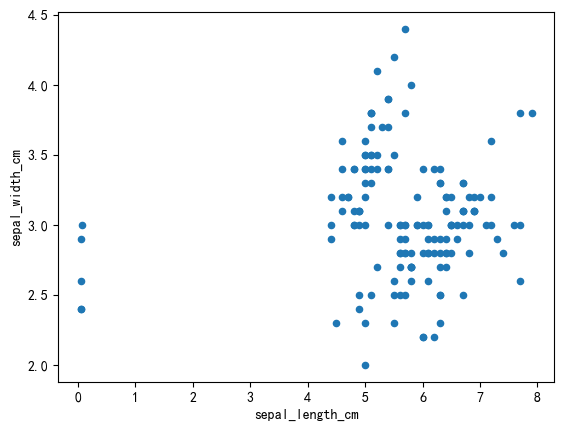

In [58]:
# 绘图方式发现异常值，散点图
iris.plot.scatter(x="sepal_length_cm",y="sepal_width_cm")

<Axes: ylabel='Frequency'>

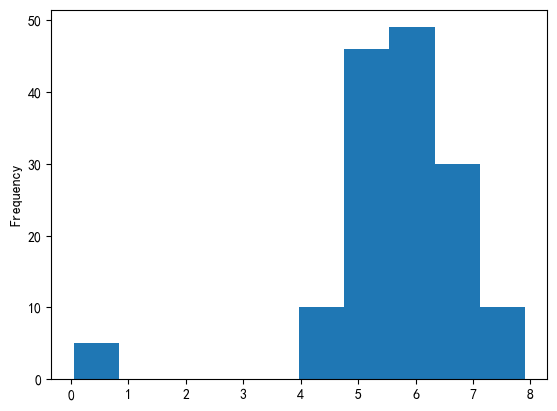

In [59]:
# 直方图发现异常
iris["sepal_length_cm"].plot.hist()

<Axes: >

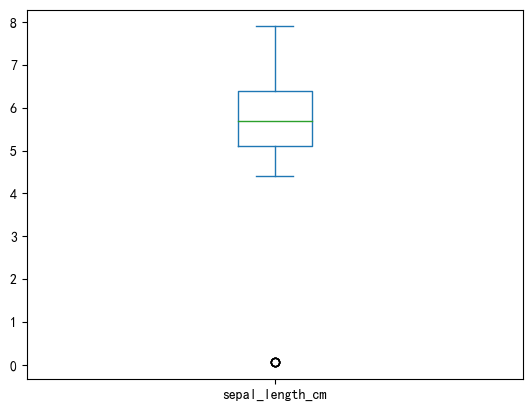

In [60]:
# 箱型图发现异常
iris["sepal_length_cm"].plot.box()

In [61]:
# 定位异常位置
iris.loc[iris['sepal_length_cm']<1,:]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [65]:
# 具体行
iris.loc[iris['sepal_length_cm']<1,"sepal_length_cm"]*=100
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.838667,3.054667,3.758667,1.207000
std,0.804416,0.433123,1.764420,0.759261
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.350000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: title={'center': 'sepal_length_cm'}, xlabel='class'>

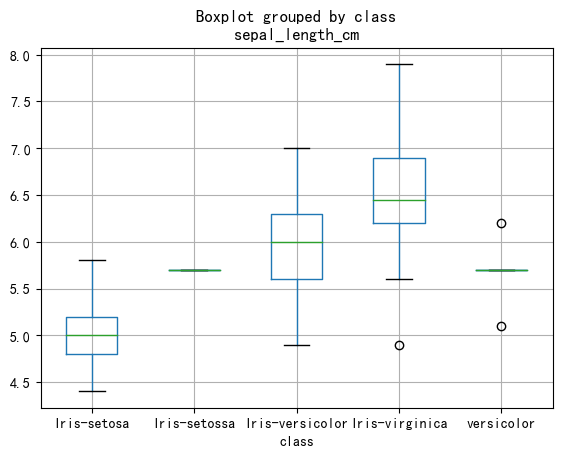

In [66]:
iris.boxplot("sepal_length_cm",by="class")

In [ ]:
# 处理异常，单位厘米和米的换算


In [ ]:
iris.describe()

In [ ]:
# 处理后的箱型图


In [ ]:
# 补充boxplot


In [ ]:
# seaborn箱型图


In [ ]:
# 类别异常
# unique


In [12]:
# 类别统计
iris["class"].unique()
iris["class"].value_counts()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [13]:
# 处理异常
iris.loc[iris["class"]=="Iris-setossa","class"]="Iris-setosa"
iris.loc[iris["class"]=="versicolor","class"]="Iris-versicolor"
iris['class'].unique()
iris['class'].value_counts()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [ ]:
# 处理后箱型图


In [14]:
# 保存
iris.to_csv("data/iris-clean1.csv",index=False)

## 5-3 数据标准化

## 项目步骤：鸢尾花数据标准化

In [16]:
# 读入清洗后的鸢尾花数据
import pandas as pd
iris = pd.read_csv("data/iris_clean.csv")
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# 转换数据类型：astype


In [ ]:
# wine数据


In [19]:
# 离差标准化数据
# 离差标准化函数
def max_min_scale(data):
    return (data-data.min())/(data.max()-data.min())

In [18]:
iris["sepal_length_cm"].min()

4.4

In [20]:
# 对花瓣长度进行离差标准化
iris["sepal_length_cm"]=np.round(iris["sepal_length_cm"].agg(max_min_scale),2)
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,0.20,3.5,1.4,0.2,Iris-setosa
1,0.14,3.0,1.4,0.2,Iris-setosa
2,0.09,3.2,1.3,0.2,Iris-setosa
3,0.06,3.1,1.5,0.2,Iris-setosa
4,0.17,3.6,1.4,0.2,Iris-setosa


In [ ]:
# wine数据标准化


In [ ]:
# 标准差标准化数据
def std_scale(data):
    return (data-data.mean())/data.std()

In [ ]:
# 对花瓣宽度进行标准差标准化


In [ ]:
# 小数定标标准化数据
import numpy as np
##自定义小数定标标准化函数
def decimal_scale(data):
    return data/10**np.ceil(np.log10(data.abs().max()))

In [ ]:
# 对花萼长度进行离差标准化


In [ ]:
from sklearn import datasets
data = datasets.load_wine()
wine = pd.DataFrame(data["data"], columns=data["feature_names"])
wine.head()
wine.to_csv("data/wine.csv", index=False)

## 5-4 数据转换

## 项目步骤：学生成绩数据的转换

In [51]:
# 读入数据
import pandas as pd
scores = pd.read_csv("data/scores.csv", encoding="gbk")
scores.head()

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


In [30]:
# 一般会把文本数据简单数值化，例如性别变为0和1
# 定义转换函数
def transform(gender):
    if gender=="女":
        return 0  #男1女0
    elif gender=="男":
        return 1

In [53]:
# 简单写法
scores.head()
scores["gender"]=scores["gender"].agg(transform)
scores.head()

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,0
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,1
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,1
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,0
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,0


In [52]:
# apply函数
scores.head()
scores["gender"].apply(lambda x:0 if x=="女" else 1)
scores.head()
scores["gender"].map({"女":0,"男":1})
scores.head()

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


0      0
1      1
2      1
3      0
4      0
      ..
594    0
595    1
596    0
597    0
598    0
Name: gender, Length: 599, dtype: int64

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


0      0
1      1
2      1
3      0
4      0
      ..
594    0
595    1
596    0
597    0
598    0
Name: gender, Length: 599, dtype: int64

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


In [43]:
scores.head()

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,0
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,1
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,1
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,0
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,0


In [54]:
# 性别的哑变量处理
genders=pd.get_dummies(scores["gender"],prefix="gender")
genders

,gender_0,gender_1
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
594,1,0
595,0,1
596,1,0
597,1,0


In [55]:
# 哑变量合并到数据
scores=pd.concat([scores,genders],axis=1)
scores.head()
# scores

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender,gender_0,gender_1
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,0,1,0
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,1,0,1
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,1,0,1
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,0,1,0
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,0,1,0


In [56]:
scores.drop("gender",axis=1,inplace=True)
scores.head()

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender_0,gender_1
0,158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,1,0
1,442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,0,1
2,249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,0,1
3,573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,1,0
4,310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,1,0


In [59]:
# 对英语成绩离散化
scores["chn"]=pd.cut(scores["chn"],bins=[0,72,84,96,108,120],labels=["不及格","及格","中等","良好","优秀"])

In [60]:
scores.head()

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender_0,gender_1
0,158,3,良好,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,1,0
1,442,7,良好,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,0,1
2,249,4,良好,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,0,1
3,573,9,良好,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,1,0
4,310,5,良好,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,1,0


<Axes: ylabel='chn'>

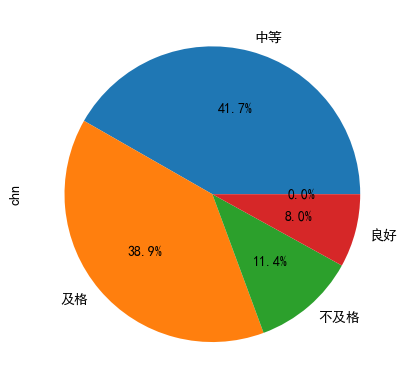

In [74]:
#画图展示语文成绩分布
scores["chn"].value_counts().plot.pie(autopct="%.1f%%")

### 补充：数据预处理中的一些小技巧

In [ ]:
# 鸢尾花数据


In [ ]:
# 去掉class字段中的"Iris-"前缀


In [ ]:
#s = "Iris-setosa"
#s[s.index("-")+1:]


In [ ]:
#s = "Iris-setosa"
#s.split("-")[1]


In [ ]:
# 前程无忧招聘数据
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel("data/招聘.xlsx")
df.head()

In [ ]:
## 设置中文显示
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
# 工作地点处理


In [ ]:
# 工作地点绘制条形图
